# Importing Libraries

In [1]:
import os
import zipfile

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import cv2

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D, Input, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import vgg16


# Importing Dataset

In [2]:
os.environ['KAGGLE_DIRECTORY'] = r'/content'

In [3]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition


Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
100% 1.98G/1.98G [00:10<00:00, 175MB/s]
100% 1.98G/1.98G [00:10<00:00, 209MB/s]


# Extracting Zip File

In [4]:
#Unzipping the zip file(dataset folder)
with zipfile.ZipFile('/content/fruit-and-vegetable-image-recognition.zip', mode ='r') as zip:
     zip.extractall('data')

# Creating train, test and validation data

In [5]:
#Since the data is organized into folders by class name (fruits and vegetables), it cannot be directly loaded as two classes using ImageDataGenerator.
#Therefore, preprocessing steps are required to assign labels 0 and 1 to the data, representing fruits and vegetables respectively.
class_names = {
    'fruits' : ['banana','apple','pear','grapes','orange','kiwi','watermelon','pomegranate','pineapple','mango'],
    'vegetables' : ['cucumber','carrot','capsicum','onion','potato','lemon','tomato','raddish','beetroot','cabbage','lettuce','spinach','soy beans','cauliflower','bell pepper','turnip','corn','sweetcorn','sweetpotato','paprika','jalepeno','ginger','garlic','peas','eggplant']
}

# Training Data

In [6]:
x_train = []
y_train = []
for fruit in class_names['fruits']:
  folderpath = f'/content/data/train/{fruit}'
  images = [image for image in os.listdir(folderpath)]


  for image in images:
    filepath = f'/content/data/train/{fruit}/{image}'

    new_image = cv2.imread(filepath)
    resized_image = cv2.resize(new_image, (224,224))
    image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB )
    x_train.append(image_rgb)

    y_train.append(np.array([0])) #This class 0 is for fruits

In [7]:
for veg in class_names['vegetables']:
  folderpath = f'/content/data/train/{veg}'
  images = [image for image in os.listdir(folderpath)]


  for image in images:
    filepath = f'/content/data/train/{veg}/{image}'

    new_image = cv2.imread(filepath)
    if image == 'Image_56.jpg' and veg == 'bell pepper':   #corrupted image is found, which is making an error
      continue

    resized_image = cv2.resize(new_image, (224,224))
    image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB )
    x_train.append(image_rgb)

    y_train.append(np.array([1])) #class 1 for vegetables

In [8]:
#converting the list to an array

x_train = np.array(x_train)
y_train = np.array(y_train)

In [9]:
x_train.shape, y_train.shape

((3027, 224, 224, 3), (3027, 1))

#Data testing

In [10]:
x_test = []
y_test = []
for fruit in class_names['fruits']:
  folderpath = f'/content/data/test/{fruit}'
  images = [image for image in os.listdir(folderpath)]


  for image in images:
    filepath = f'/content/data/test/{fruit}/{image}'

    new_image = cv2.imread(filepath)
    resized_image = cv2.resize(new_image, (224,224))
    image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB )
    x_test.append(image_rgb)

    y_test.append(np.array([0]))

In [11]:
for veg in class_names['vegetables']:
  folderpath = f'/content/data/test/{veg}'
  images = [image for image in os.listdir(folderpath)]


  for image in images:
    filepath = f'/content/data/test/{veg}/{image}'

    new_image = cv2.imread(filepath)
    resized_image = cv2.resize(new_image, (224,224))
    image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB )
    x_test.append(image_rgb)

    y_test.append(np.array([1]))

In [12]:
x_test = np.array(x_test)
y_test = np.array(y_test)
print(x_test.shape, y_test.shape)

(349, 224, 224, 3) (349, 1)


## Validation set

In [13]:
x_val = []
y_val = []
for fruit in class_names['fruits']:
  folderpath = f'/content/data/validation/{fruit}'
  images = [image for image in os.listdir(folderpath)]


  for image in images:
    filepath = f'/content/data/validation/{fruit}/{image}'

    new_image = cv2.imread(filepath)
    resized_image = cv2.resize(new_image, (224,224))
    image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB )
    x_val.append(image_rgb)

    y_val.append(np.array([0]))


In [14]:
for veg in class_names['vegetables']:
  folderpath = f'/content/data/validation/{veg}'
  images = [image for image in os.listdir(folderpath)]


  for image in images:
    filepath = f'/content/data/validation/{veg}/{image}'

    new_image = cv2.imread(filepath)
    resized_image = cv2.resize(new_image, (224,224))
    image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB )
    x_val.append(image_rgb)

    y_val.append(np.array([1]))

In [15]:

x_val = np.array(x_val)
y_val = np.array(y_val)

In [16]:
x_val.shape, y_val.shape

((342, 224, 224, 3), (342, 1))

 Creating 2 different sets of resized data
 + one for the pre trained models which is of (128,128,3)
 + The other model is our one that has a (32, 32, 3) dimension,

In [17]:
x_train_32 = []
x_test_32 = []
x_val_32 = []

for img in x_train:
  new_img = cv2.resize(img,(32,32))
  x_train_32.append(new_img)

for img in x_test:
  new_img = cv2.resize(img,(32,32))
  x_test_32.append(new_img)

for img in x_val:
  new_img = cv2.resize(img,(32,32))
  x_val_32.append(new_img)

In [18]:
x_train_32 = np.array(x_train_32)
x_test_32 = np.array(x_test_32)
x_val_32 = np.array(x_val_32)

### Normalizing

In [19]:
x_train = (x_train/255.0).astype('float32')
x_test = (x_test/255.0).astype('float32')
x_val = (x_val/255.0).astype('float32')

x_train_32 = (x_train_32/255.0).astype('float32')
x_test_32 = (x_test_32/255.0).astype('float32')
x_val_32 = (x_val_32/255.0).astype('float32')

#Checking the Images in the dataset

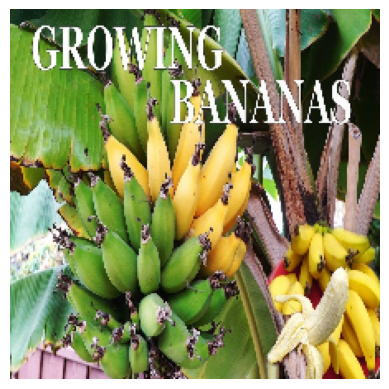

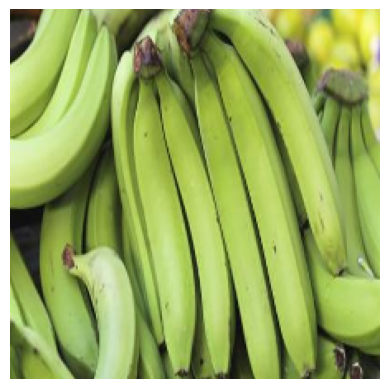

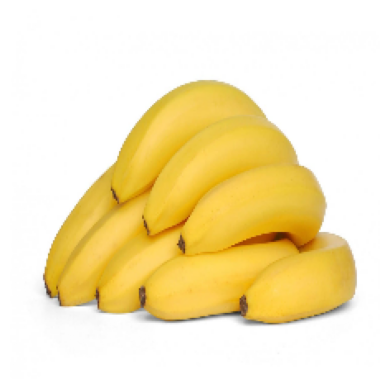

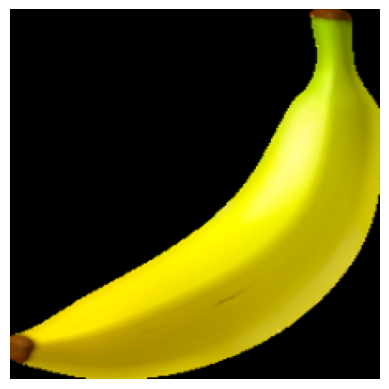

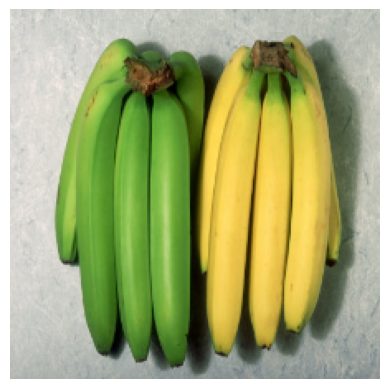

In [20]:

for i in range(5):
  plt.imshow(x_train[i])
  plt.axis('off')
  plt.show()

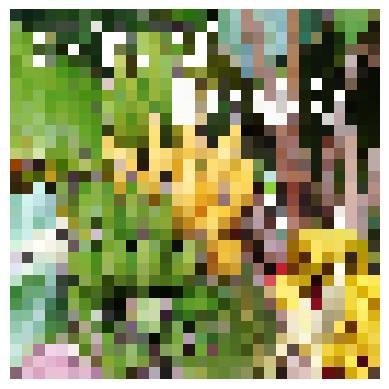

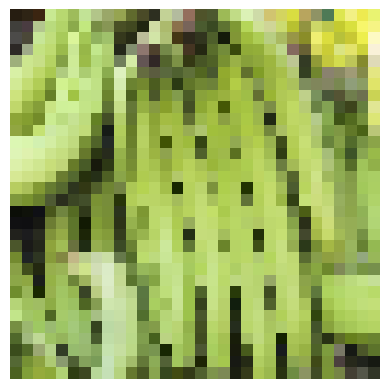

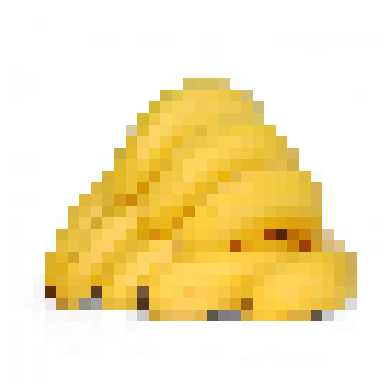

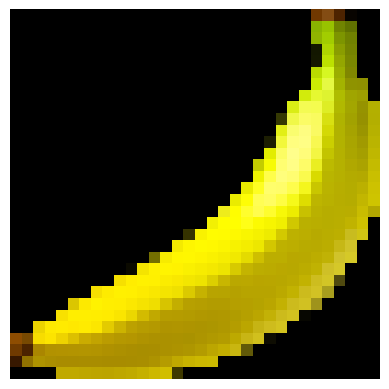

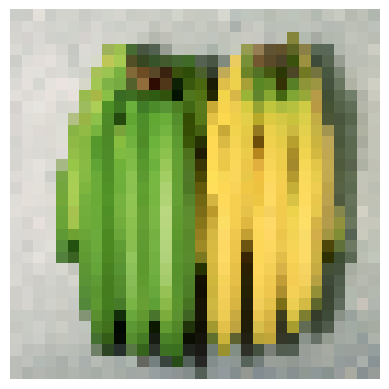

In [21]:

for i in range(5):
  plt.imshow(x_train_32[i])
  plt.axis('off')
  plt.show()

#Building Pre Trained VGG 16 architechture

In [22]:
#Preprocessing for vgg16 architechture
vgg_input = vgg16.preprocess_input(x_train)
vgg_val = vgg16.preprocess_input(x_val)
vgg_test = vgg16.preprocess_input(x_test)

In [23]:
vgg = VGG16(
    weights = 'imagenet',
    input_shape = (224,224,3),
    include_top = False
)

#Freezing the model
vgg.trainable = False

#Adding custom layers
model1 = Sequential([
    vgg,
    Flatten(),
    Dense(1024, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')

])



#model compilation
model1.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [24]:
history = model1.fit(vgg_input,y_train,
           epochs = 10,
           validation_data = (vgg_val,y_val))

Epoch 1/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 47s 344ms/step - accuracy: 0.6154 - loss: 1.6301 - val_accuracy: 0.7164 - val_loss: 0.7986
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 14s 152ms/step - accuracy: 0.6329 - loss: 0.7435 - val_accuracy: 0.7310 - val_loss: 0.5657
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 21s 153ms/step - accuracy: 0.7204 - loss: 0.6000 - val_accuracy: 0.7281 - val_loss: 0.5584
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 21s 156ms/step - accuracy: 0.6693 - loss: 0.6939 - val_accuracy: 0.2836 - val_loss: 1.0579
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 20s 154ms/step - accuracy: 0.6188 - loss: 0.7493 - val_accuracy: 0.7398 - val_loss: 0.5607
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 15s 155ms/step - accuracy: 0.7366 - loss: 0.5670 - val_accuracy: 0.7485 - val_loss: 0.5822
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 19s 140ms/step - accuracy: 0.7076 - loss: 0.6028 - val_accuracy: 0.7544 - val_loss: 0.5851
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 21s 141ms/step - accuracy: 0.7271 - loss: 0.5781 - val_accu

In [25]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      25,691,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,985,093 (350.90 MB)

 Trainable params: 25,756,801 (98.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 51,513,604 (196.51 MB)

## Plotting Train and Validation Accuracy

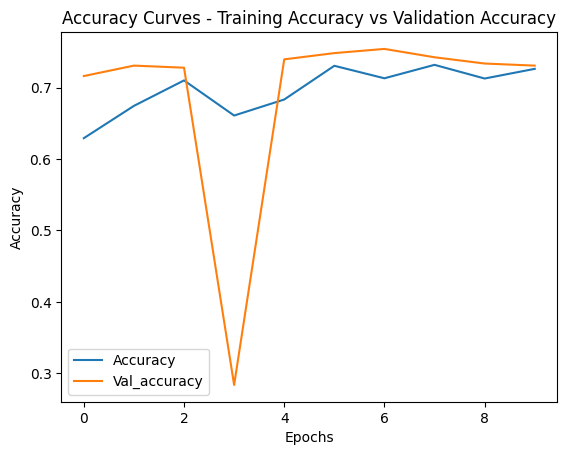

In [26]:
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val_accuracy')
plt.title('Accuracy Curves - Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Plotting Train and Validation Loss

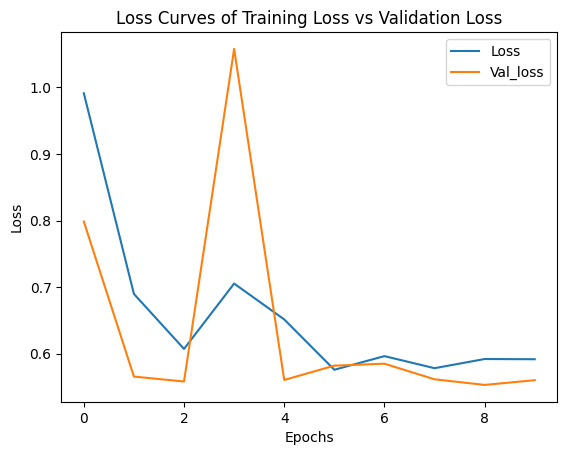

In [27]:
plt.plot(history.history['loss'], label = 'Loss')
plt.plot(history.history['val_loss'], label = 'Val_loss')
plt.title('Loss Curves of Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluating test data

In [28]:
loss,acc = model1.evaluate(vgg_test,y_test, verbose = 2)

print(f'Test Accuracy: {acc}')
print(f'Test Loss: {loss}')

11/11 - 13s - 1s/step - accuracy: 0.7307 - loss: 0.5609
Test Accuracy: 0.730659008026123
Test Loss: 0.5608800053596497


# CNN Model

In [29]:
model = Sequential()

#Input layer
model.add(Input(shape=(32,32,3)))

#Creating First Block
model.add(Conv2D(filters= 64,
                 kernel_size = (3,3),
                 activation = 'relu',
                 padding = 'same'))
model.add(Conv2D(filters= 64,
                 kernel_size = (3,3),
                 activation = 'relu',
                 padding = 'same'))

model.add(MaxPooling2D(pool_size=(4,4)))

#Creating SecondBlock
model.add(Conv2D(256,(3,3), activation = 'relu',strides =(2,2)))
model.add(Conv2D(256,(3,3), activation = 'relu',padding ='same'))
model.add(MaxPooling2D(pool_size=(3,3)))



#Creating FNN- FeedForward Neural Network
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))


In [30]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [31]:
history1 = model.fit(x_train_32,y_train,
                    epochs = 10,
                    validation_data=(x_val_32,y_val))

Epoch 1/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.7186 - loss: 0.6087 - val_accuracy: 0.7164 - val_loss: 0.6043
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7329 - loss: 0.5812 - val_accuracy: 0.7164 - val_loss: 0.5780
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7314 - loss: 0.5551 - val_accuracy: 0.7193 - val_loss: 0.5402
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7133 - loss: 0.5573 - val_accuracy: 0.7310 - val_loss: 0.5150
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7446 - loss: 0.5177 - val_accuracy: 0.7661 - val_loss: 0.4978
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7710 - loss: 0.4802 - val_accuracy: 0.8567 - val_loss: 0.3571
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7959 - loss: 0.4404 - val_accuracy: 0.8977 - val_loss: 0.2705
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8277 - loss: 0.3693 - val_accuracy: 0.9035 - val_loss

In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 256)           │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 3, 3, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,527,685 (9.64 MB)

 Trainable params: 842,561 (3.21 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,685,124 (6.43 MB)

## Plotting train and validation loss

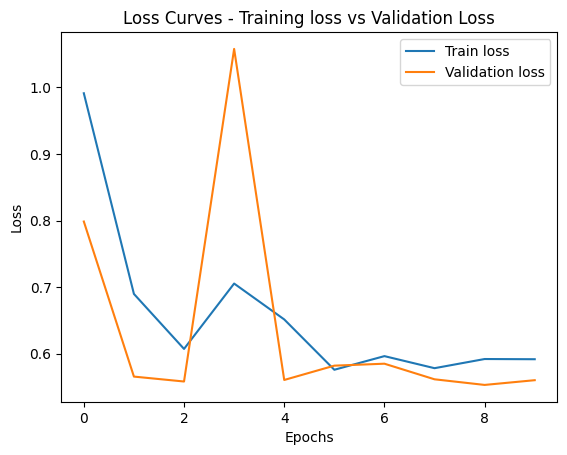

In [33]:
plt.plot(history.history['loss'], label = 'Train loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.title('Loss Curves - Training loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plotting Train and Validation Accuracy

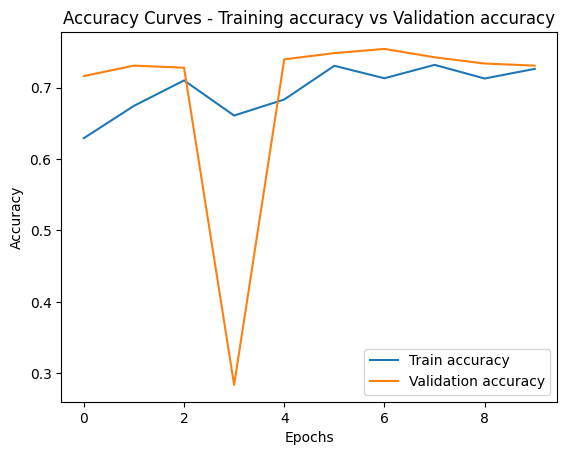

In [34]:
plt.plot(history.history['accuracy'], label = 'Train accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.title('Accuracy Curves - Training accuracy vs Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Evaluating Test Data

In [35]:
test_loss,test_acc = model.evaluate(x_test_32,y_test, verbose = 2)

11/11 - 1s - 61ms/step - accuracy: 0.9542 - loss: 0.1340


In [37]:
print(f'Test Accuracy: {test_acc}')
print(f'Test Loss: {test_loss}')

Test Accuracy: 0.9541547298431396
Test Loss: 0.13404689729213715
